# Lab6_Part_1_Time 

In [1]:
import pandas as pd

# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [2]:
transactions_df = pd.read_csv("transactions.csv")
transactions_df.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [3]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [4]:
# conversion with parse dates in read_csv
transactions = pd.read_csv("transactions.csv", parse_dates=["date"])
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [6]:
# conversion with to_datetime
transactions = pd.read_csv("transactions.csv")
transactions['date'] = pd.to_datetime(transactions['date'])
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [8]:
# conversion with astype
transactions = pd.read_csv("transactions.csv")
transactions['date'] = transactions['date'].astype('datetime64[ns]')
transactions


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [9]:
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [10]:
# Calcualte the maximum datetime
max_date = transactions['date'].max()
print('Max date: ', max_date)

Max date:  2017-08-15 00:00:00


In [11]:
from datetime import datetime

transactions['time_to_last_date'] = max_date - transactions['date']
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day_of_week'] = transactions['date'].dt.day_name()
transactions

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-01-01,25,770,1687 days,2013,1,Tuesday
1,2013-01-02,1,2111,1686 days,2013,1,Wednesday
2,2013-01-02,2,2358,1686 days,2013,1,Wednesday
3,2013-01-02,3,3487,1686 days,2013,1,Wednesday
4,2013-01-02,4,1922,1686 days,2013,1,Wednesday
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,0 days,2017,8,Tuesday
83484,2017-08-15,51,1573,0 days,2017,8,Tuesday
83485,2017-08-15,52,2255,0 days,2017,8,Tuesday
83486,2017-08-15,53,932,0 days,2017,8,Tuesday


# Assignment 2: Time Arithmetic




max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.



In [12]:
# overwrite previous transactions df

transactions = pd.read_csv("transactions.csv", parse_dates=["date"])

In [13]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [14]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date=transactions["date"].max() - transactions["date"],
)

transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [15]:
from datetime import timedelta

# Add three weeks to time to last date column
# Then divide the timedelta (converted to integer) into integer weeks

transactions['time_to_last_date_plus_3_weeks'] = transactions['time_to_last_date'] + timedelta(weeks=3)

# Convert the timedelta to integer days and then to weeks
transactions['integer_weeks'] = (transactions['time_to_last_date_plus_3_weeks'].dt.days // 7)
transactions

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,time_to_last_date_plus_3_weeks,integer_weeks
0,2013-01-01,25,770,2013,1,1,1687 days,1708 days,244
1,2013-01-02,1,2111,2013,1,2,1686 days,1707 days,243
2,2013-01-02,2,2358,2013,1,2,1686 days,1707 days,243
3,2013-01-02,3,3487,2013,1,2,1686 days,1707 days,243
4,2013-01-02,4,1922,2013,1,2,1686 days,1707 days,243
...,...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,0 days,21 days,3
83484,2017-08-15,51,1573,2017,8,1,0 days,21 days,3
83485,2017-08-15,52,2255,2017,8,1,0 days,21 days,3
83486,2017-08-15,53,932,2017,8,1,0 days,21 days,3


# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [16]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("oil.csv", index_col="date", parse_dates=True)
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [17]:
# This is a synonym for datetime64
oil.index.dtype

dtype('<M8[ns]')

In [18]:
# mean of original series
oil.mean()

dcoilwtico    67.714366
dtype: float64

<Axes: xlabel='date'>

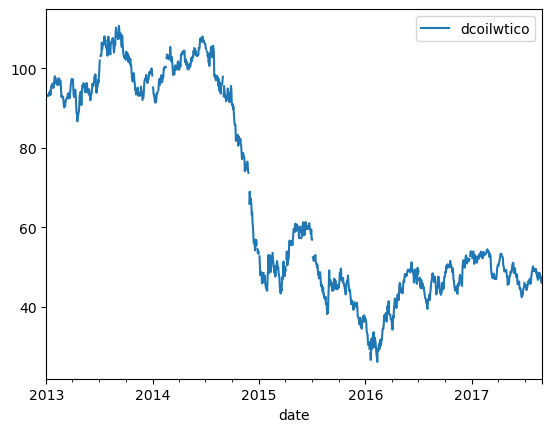

In [19]:
import matplotlib.pyplot as plt
# original plot
oil.plot()

In [20]:
# mean of each type of missing value handling for time series
print(oil.ffill().mean(), 
      oil.bfill().mean(),
      oil.interpolate().mean()
     )

dcoilwtico    67.671249
dtype: float64 dcoilwtico    67.673325
dtype: float64 dcoilwtico    67.661824
dtype: float64


<Axes: xlabel='date'>

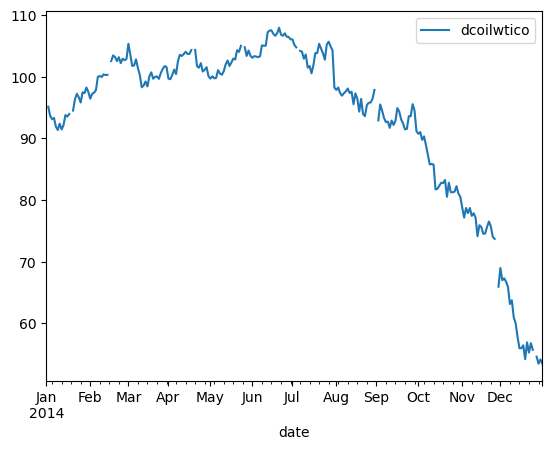

In [21]:
# Filter to 2014 then plot forward filled Series
df_2014 = oil[oil.index.year == 2014]
df_2014.plot()

<Axes: xlabel='date'>

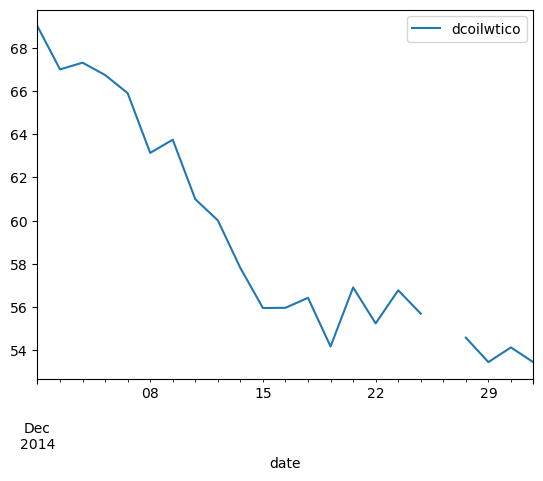

In [22]:
# Filter to December 2014 then plot forward filled Series
df_2014_december = df_2014[df_2014.index.month == 12]
df_2014_december.plot()

<Axes: xlabel='date'>

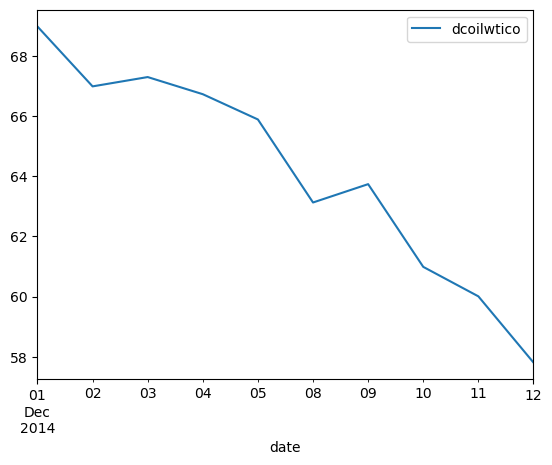

In [23]:
# Filter to first two weeks of December 2014 then plot forward filled Series
start_date = '2014-12-01'
end_date = '2014-12-14'
df_2014_december_2_weeks = df_2014.loc[start_date:end_date]
df_2014_december_2_weeks.plot()

# Assignment 4: Shift and Diff

looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

<Axes: >

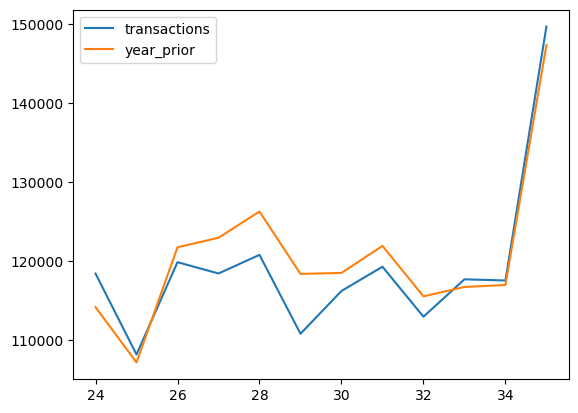

In [24]:
transactions = pd.read_csv("transactions.csv", parse_dates=["date"])

# filter df to store 47, 'drop' store_nbr column via loc
df_filtered = transactions.loc[transactions['store_nbr'] == 47, ['date', 'transactions']]

# Calculate sum of sales by year and month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')
monthly_sales = df_filtered.groupby('year_month')['transactions'].sum().reset_index()

# Calculate a 'year_prior' column by shiftly monthly sales series forward by 12 rows (months)
monthly_sales['year_prior'] = monthly_sales['transactions'].shift(12)



# Filter to 2015 and plot
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)  # Convert to string for filtering
monthly_sales_2015 = monthly_sales[monthly_sales['year_month'].str.startswith('2015')]

monthly_sales_2015.plot()

# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

<Axes: xlabel='date'>

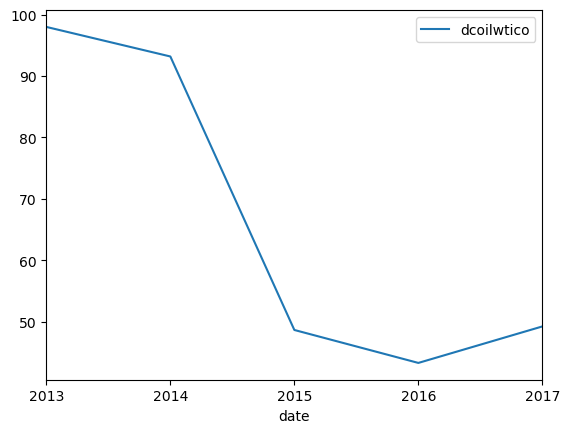

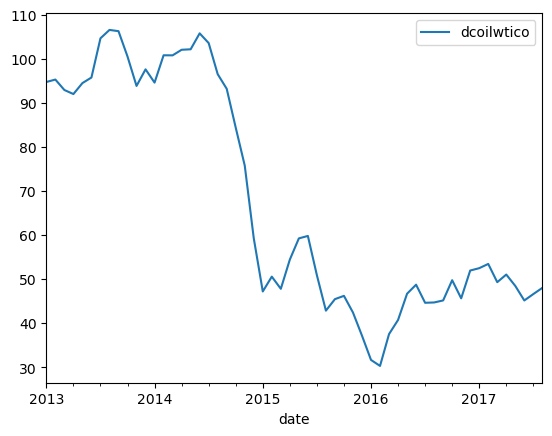

In [26]:
oil = pd.read_csv("oil.csv", parse_dates=True)
oil['date'] = pd.to_datetime(oil['date'])


# Set 'date' as the index
oil.set_index('date', inplace=True)

# Resample the data by month and calculate the average price
monthly_avg_price = oil.resample('M').mean()

# Resample the data by year and calculate the average price
yearly_avg_price = oil.resample('Y').mean()

yearly_avg_price.plot()
monthly_avg_price.plot()


# Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.




In [28]:
# recreate transactions47 with date as index 
transactions = pd.read_csv("transactions.csv", parse_dates=["date"])
transactions47 = transactions[transactions['store_nbr'] == 47].set_index('date')

In [29]:
# Create 90 day rolling average column, drop original transactions column and plot.
transactions47['90_day_avg'] = transactions47['transactions'].rolling(window=90).mean()
transactions47.drop(columns=['transactions', 'store_nbr'], inplace=True)
transactions47

,90_day_avg
date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
2013-01-06,NaN
...,...
2017-08-11,3838.744444
2017-08-12,3832.100000
2017-08-13,3835.388889


<Axes: xlabel='date'>

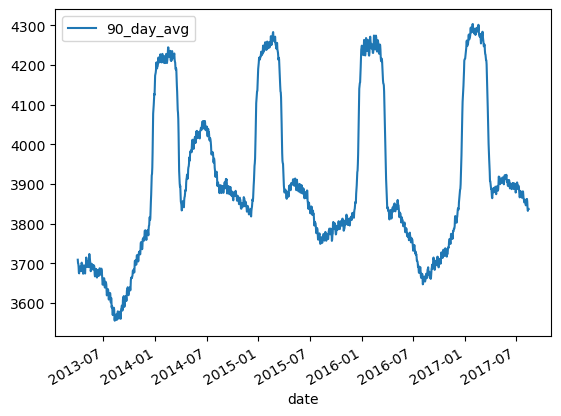

In [30]:
# original daily series for comparison
transactions47.plot()